# **Capstone Project**

### **Pneumonia Detection**

**Problem Statement:** Chest Radiograph is the most commonly used or performed diagnostic imaging Technology. Due to high volume of chest radiography, it could be very time consuming and intensive for the radiologists to review each image manually. As such, an automated solution is ideal to locate the position of inflammation in an image. By having such an automated pneumonia screening system, this can assist physicians to make better clinical decisions.

**Business Domain Value:** Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

In [ ]:
# Mounting Google CoLab
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
#gpu_info = !nvidia-smi
#gpu_info = '\n'.join(gpu_info)
#if gpu_info.find('failed') >= 0:
 # print('Not connected to a GPU')
#lse:
 # print(gpu_info)

In [ ]:
!pip install mrcnn

     |████████████████████████████████| 51 kB 238 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54930 sha256=7c47c822d7528a07ae1d62773a747a385f679154fba93b04486b30202c5ae0f7
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
!pip install keras==2.4.3
!pip install tensorflow==2.4.1

  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.4.3 which is incompatible.
     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 37.8 MB/s 
     |████████████████████████████████| 462 kB 46.5 MB/s 
     |████████████████████████████████| 2.9 MB 33.9 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.

In [ ]:
# Import all required libraries
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import os
from matplotlib.patches import Rectangle
np.random.seed(22)
from mrcnn.config import Config
from keras.layers import Layer
import mrcnn.model as model_library

In [ ]:
# Install pydicom package to handle .dcm files

!pip install pydicom
import pydicom as pyd

     |████████████████████████████████| 2.0 MB 4.5 MB/s 


In [ ]:
#Unzip the .zip file

#from zipfile import ZipFile

#with ZipFile('/content/drive/MyDrive/AI_ML_Projects/Capstone Project/rsna-pneumonia-detection-challenge.zip', 'r') as z:
 # z.extractall()

**Pre-Processing, Data Visualization, EDA**

In [ ]:
# Setting path
root_path =  '/content/drive/MyDrive/Kaggle/Capstone/'
os.chdir(root_path)

In [ ]:
# Checking file format (.dcm) in the train images folder

for file in os.listdir((os.path.join(root_path,'stage_2_train_images'))):
  if not file.endswith('.dcm'):
    print(file)
  #else:
    #print('All files inside Train Images folder are .dcm format')

In [ ]:
# Checking file format (.dcm) in the test images folder

for file in os.listdir((os.path.join(root_path,'stage_2_test_images'))):
  if not file.endswith('.dcm'):
    print(file)
  #else:
    #print('All files inside Test Images folder are .dcm format')

In [ ]:
label_meta_data = pd.read_csv('stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv('stage_2_train_labels.csv')

print('Size of Dataset 1: ',train_labels_df.shape)
print('Size of Dataset 2: ',label_meta_data.shape)
print('Number of Unique X-Rays in Dataset 1 : ',train_labels_df['patientId'].nunique())
print('Number of Unique X-Rays in Dataset 2 : ',label_meta_data['patientId'].nunique())

Size of Dataset 1:  (30227, 6)
Size of Dataset 2:  (30227, 2)
Number of Unique X-Rays in Dataset 1 :  26684
Number of Unique X-Rays in Dataset 2 :  26684


In [ ]:
train_labels_df.drop_duplicates(inplace=True)
label_meta_data.drop_duplicates(inplace=True)
print('Size of Dataset 1: ',train_labels_df.shape)
print('Size of Dataset 2: ',label_meta_data.shape)
print('Number of Unique X-Rays in Dataset 1 : ',train_labels_df['patientId'].nunique())
print('Number of Unique X-Rays in Dataset 2 : ',label_meta_data['patientId'].nunique())

Size of Dataset 1:  (30227, 6)
Size of Dataset 2:  (26684, 2)
Number of Unique X-Rays in Dataset 1 :  26684
Number of Unique X-Rays in Dataset 2 :  26684


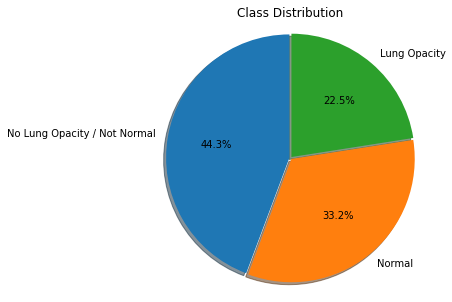

In [ ]:
label_count=label_meta_data['class'].value_counts()
explode = (0.01,0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Class Distribution')
plt.show()

In [ ]:
# Check for mismatches betwen the 2 csv files
list_class_Id = list(label_meta_data['patientId'])
list_label_Id = list(train_labels_df['patientId'])

if list_class_Id == list_label_Id: 
    print ("The patientIds in both files are identical") 
else : 
    print ("The patientIds in both files  are not identical")

The patientIds in both files  are not identical


In [ ]:
merged_df = pd.merge(left = label_meta_data, right = train_labels_df, how = 'left', on = 'patientId')

del label_meta_data, train_labels_df

merged_df.info(null_counts = True)
merged_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1


In [ ]:
merged_df = merged_df.drop_duplicates()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
merged_df['patientId'].nunique()

26684

In [ ]:
merged_df['patientId'].value_counts()

8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
                                       ..
cf2c825f-a9a5-48b0-a9df-3b79b95a673a    1
789e8a7a-2ded-466f-8d50-17e8bc955978    1
d60a469e-7d06-432d-88b5-3ad8f25c3548    1
3d77d4a8-44f0-40c8-b009-0db072ab9314    1
fffc95b5-605b-4226-80ab-62caec682b22    1
Name: patientId, Length: 26684, dtype: int64

In [ ]:
merged_df[merged_df['patientId'] == '349f10b4-dc3e-4f3f-b2e4-a5b81448ce87']

,patientId,class,x,y,width,height,Target
2860,349f10b4-dc3e-4f3f-b2e4-a5b81448ce87,Lung Opacity,365.0,192.0,115.0,173.0,1
2861,349f10b4-dc3e-4f3f-b2e4-a5b81448ce87,Lung Opacity,614.0,264.0,128.0,171.0,1
2862,349f10b4-dc3e-4f3f-b2e4-a5b81448ce87,Lung Opacity,594.0,465.0,259.0,272.0,1
2863,349f10b4-dc3e-4f3f-b2e4-a5b81448ce87,Lung Opacity,204.0,385.0,219.0,222.0,1


In [ ]:
merged_df[merged_df['patientId'] == '52021b42-19c1-4d5b-8344-4188f4fdfd6a']

,patientId,class,x,y,width,height,Target
6831,52021b42-19c1-4d5b-8344-4188f4fdfd6a,Normal,NaN,NaN,NaN,NaN,0


In [ ]:
merged_df[merged_df['patientId'] == '00aecb01-a116-45a2-956c-08d2fa55433f']

,patientId,class,x,y,width,height,Target
14,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1
15,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,547.0,299.0,119.0,165.0,1


In [ ]:
#Distribution of Bounding Boxes and Labels
merged_df['patientId'].value_counts().value_counts()

1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

In [ ]:
merged_df.groupby(['class', 'Target']).size().reset_index(name='Patient Count')

,class,Target,Patient Count
0,Lung Opacity,1,9555
1,No Lung Opacity / Not Normal,0,11821
2,Normal,0,8851


In [ ]:
# Check for missing values in the class label file

merged_df.isnull().sum()

patientId        0
class            0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [ ]:
# Check for duplicate patientID in class label file

merged_df.duplicated().sum()

0

In [ ]:
# Check for % of each category in the dataset

merged_df["class"].value_counts() / len(merged_df)

No Lung Opacity / Not Normal    0.391074
Lung Opacity                    0.316108
Normal                          0.292818
Name: class, dtype: float64

In [ ]:
# Check for duplicate patientID

merged_df.duplicated().sum()

0

**Target Distribution**

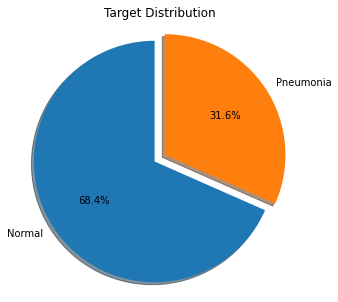

In [ ]:
# lets take a look at our Target Distribution
label_count=merged_df['Target'].value_counts()
explode = (0.1,0.0)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=['Normal','Pneumonia'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

In [ ]:
# Check for mismatches between the csv files and the DICOM training image files

list_DICOM_Id = []
for i in os.listdir((os.path.join(root_path,'stage_2_train_images'))):
  list_DICOM_Id.append(i.split('.')[0])

if set(list_class_Id) == set(list_DICOM_Id): 
    print ("The patientIds in both files are identical. There are duplicate patientIds in the csv files.") 
else : 
    print ("The patientIds in both files  are not identical. There is a mismatch in patientIds between the DICOM files and the csv files.")

The patientIds in both files are identical. There are duplicate patientIds in the csv files.


In [ ]:
# Confirm difference in count

len(list_class_Id) - len(list_DICOM_Id)

0

In [ ]:
# When target==1, are any of the box coordinates null? As per logic, should be false.

merged_df.loc[merged_df['Target']==1, ['x', 'y', 'width', 'height']].isnull().any()

x         False
y         False
width     False
height    False
dtype: bool

In [ ]:
# when target==0, are all of the box coordinates null? As per logic, should be true.

merged_df.loc[merged_df['Target']==0, ['x', 'y', 'width', 'height']].isnull().all()

x         True
y         True
width     True
height    True
dtype: bool

### **Observations:** 
Images from the **"stage_2_train_images"** folder are taken via CXR, which is a chest x-ray. It produces images of the heart, lungs, airways, blood vessels and the bones of the spine and chest. Each image corresponds to the x-ray of a unique patientId. It is accompanied by 2 sets of files, "stage_2_detailed_class_info" and "stage_2_train_labels".
There are 26,684 DICOM image files. From the above, there appears to have more records in "stage_2_detailed_class_info" and "stage_2_train_labels" files with a number of 30,227 records, a difference of 3,543. This might be due to additional records to detect different pneumonia areas within the same x ray image. We can confirm this later when we take a deeper look at the DICOM images.



**"stage_2_detailed_class_info"**

"stage_2_detailed_class_info" file contains the class labelling of the patientIds' xray image into 3 classes, "No Lung Opacity / Not Normal", "Normal" and "Lung Opacity". There is no missing data from this file. There is a slight imbalance in the proportion of available data for "No Lung Opacity / Not Normal" at 39%, and 31% and 29% for "Normal" and "Lung Opacity" respectively.


**"stage_2_train_labels"**

"stage_2_train_labels" contains the bounding boxes of detected pneumonia in the corresponding patientIds' xray images with the x and y co-ordinates and the height and weight of the box, and a target column which is either a 1 for pneumonia detected, and hence will have a bounding box, or 0 for no pneumonia detected. When pneumonia is detected, it will correspond to the label of "Lung Opacity" in the "stage_2_detailed_class_info" file. There are 9,555 records of patientIDs with bounding boxes, and this corresponds to the number of labels of "Lung Opacity" in the "stage_2_detailed_class_info" file.



**Exploratory Data Analysis**

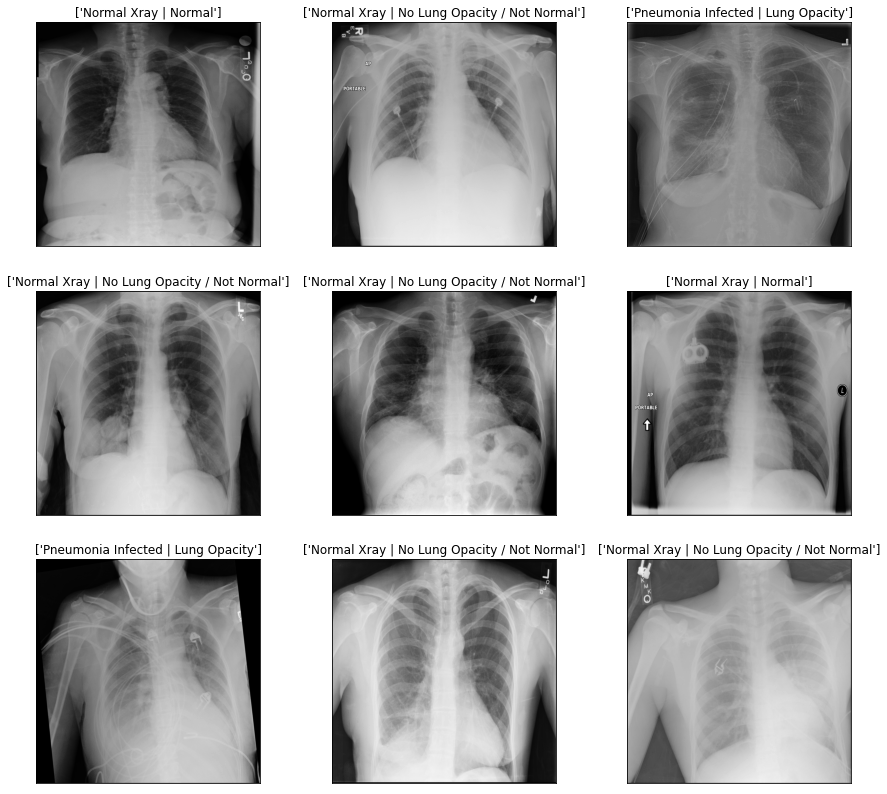

In [ ]:
r=c=3
fig= plt.figure(figsize=(15,14))
for i in range(1,r*c+1):
    id_= np.random.choice(merged_df['patientId'].values)
    label_0= np.unique(merged_df['Target'][merged_df['patientId']==id_])
    label_1= np.unique(merged_df['class'][merged_df['patientId']==id_])
    
    #read xray
    img=pyd.read_file(os.path.join(root_path+ 'stage_2_train_images/',id_+'.dcm')).pixel_array
    fig.add_subplot(r,c,i)
    plt.imshow(img,cmap='gray')
    if label_0==1:
        plt.title('Pneumonia Infected'+' | '+label_1)
    else:
        plt.title('Normal Xray'+' | '+label_1)
    plt.xticks([])
    plt.yticks([])

In [ ]:
label_meta_data = pd.read_csv('stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv('stage_2_train_labels.csv')

Label: No Lung Opacity / Not Normal
0004cfab-14fd-4e49-80ba-63a80b6bddd6


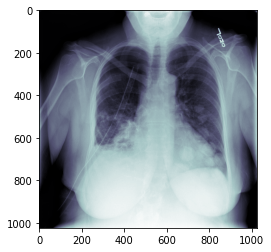

In [ ]:
# DICOM image with class label "No Lung Opacity / Not Normal"

print('Label: No Lung Opacity / Not Normal')
print(label_meta_data['patientId'][0])

filename = label_meta_data['patientId'][0] + '.dcm'
filename = (os.path.join(root_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

Label: Normal
003d8fa0-6bf1-40ed-b54c-ac657f8495c5


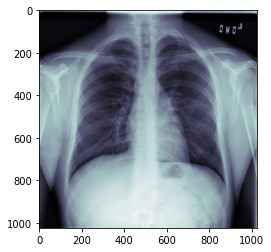

In [ ]:
# DICOM image with class label "Normal"

print('Label: Normal')
print(label_meta_data['patientId'][3])

filename = label_meta_data['patientId'][3] + '.dcm'
filename = (os.path.join(root_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
label_meta_data.info

<bound method DataFrame.info of                                   patientId                         class
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
...                                     ...                           ...
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity

[30227 rows x 2 columns]>

Label: Lung Opacity
00436515-870c-4b36-a041-de91049b9ab4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


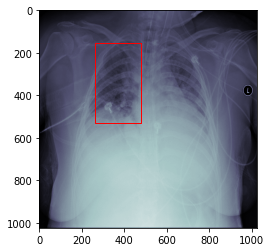

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('Label: Lung Opacity')
print(train_labels_df['patientId'][4])

filename = train_labels_df['patientId'][4] + '.dcm'
filename = (os.path.join(root_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((train_labels_df['x'][4], train_labels_df['y'][4]), train_labels_df['width'][4], train_labels_df['height'][4], fill=False, color='red')

plt.axes().add_patch(bb)
plt.show()

Label: Lung Opacity
00436515-870c-4b36-a041-de91049b9ab4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


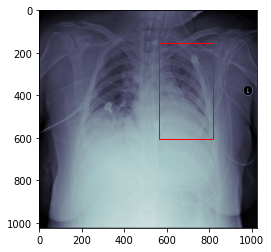

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('Label: Lung Opacity')
print(train_labels_df['patientId'][5])

filename = train_labels_df['patientId'][5] + '.dcm'
filename = (os.path.join(root_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((train_labels_df['x'][5], train_labels_df['y'][5]), train_labels_df['width'][5], train_labels_df['height'][5], fill=False, color='red')

plt.axes().add_patch(bb)
plt.show()

Label: Lung Opacity
02ea6b76-4189-47c5-a8bf-70590f84ebd8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


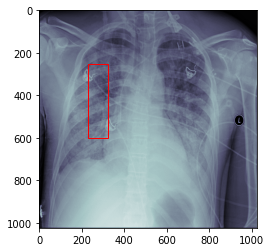

In [ ]:
# DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('Label: Lung Opacity')
print(train_labels_df['patientId'][111])

filename = train_labels_df['patientId'][111] + '.dcm'
filename = (os.path.join(root_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((train_labels_df['x'][111], train_labels_df['y'][111]), train_labels_df['width'][111], train_labels_df['height'][111], fill=False, color='red')

plt.axes().add_patch(bb)
plt.show()

**EDA Observations:** 

Details of EDA of some images, I have loaded a few DICOM image files for visualization. I have loaded couple of images from each of the 3 classes, "No Lung Opacity / Not Normal", "Normal" and "Lung Opacity". For images labelled with "Lung Opacity", I have marked with bounding box which detected the lung opacity / inflammation area for pneumonia in red.

The first image I have loaded is labelled with "No Lung Opacity / Not Normal". From this image, it is loaded as monochromatic, where white usually reveals the bones, skin and organs of the person. Normal lungs will not absorb X-Rays and shows in dark color. We can see the spinal cord and the rib clearly. Where there are black patches, they are empty space. For this set of lungs, there are some faint white patches in the lung area, when it is expected to be empty, ie black. This might be the case why the image is labelled with "No Lung Opacity / Not Normal".

For the second loaded image, it is labelled with "Normal". Here I can see that the area of lungs is clearer compared to the first image. Although visually, it appears to be only slightly clearer compared to the first image.

For the third and fourth loaded images, they are labelled with "Lung Opacity". They are actually duplicate patientIDs and I loaded both of them to see if there are any differences. The third image has the bounding box locating the opacity on the right side lung, while the fourth image has the bounding box locating the opacity on the left side lung, both pointing to the same patientID. This makes sense as pneumonia may develop on either side of the lungs or both lungs as well. This might be why as to there being duplicate patientIDs in the csv files as they may point to 2 separate records of both lung sides detecting the opacity. It would make sense to retain the 2 records, so that the algorithmn created will be able to detect lung opacity in both sides of the lungs, rather than being skewed or bias to only be able to detect 1 side of the lungs. As such, I will not be removing the duplicate patientId records from the file.

For the 5th and final image loaded, it is labelled with "Lung Opacity". I loaded this to check as the bounding box region provided is quite small, and I would like to see if there are any issues with this. To be honest, as I am not an expert in this domain, visually inspecting it does not really tell me much that this indeed has lung opacity. However, it does make sense that pneumonia may not necessarily be apparent, and this might be a case of early detection, since the bounding box area is relatively small compared to the previous 2 images.

The above analysis of the images highlight the difficulty in visual inspection of the DICOM images and further strengthens the need for an algorithmn to be able to assist the medical practioners in making better informed decisions. Despite the duplicate records and uncertain lung opacity detection, I would still retain all the data for training my model.

### **Model Building**

**Step 1 Creation of numpy masks arrays as input to datagenerator function**

In [ ]:
# Creating 64 x 64 mask numpy arrays for each DICOM image and storing in a separate folder

i = 1
for index, row in train_labels_df.iterrows():

  mask_array = np.zeros((64, 64))
  mask_path_npy = row['patientId'] + '.npy'

  train_labels_df['x'] = train_labels_df['x'].fillna(0).astype(int)
  train_labels_df['y'] = train_labels_df['y'].fillna(0).astype(int)
  train_labels_df['width'] = train_labels_df['width'].fillna(0).astype(int)
  train_labels_df['height'] = train_labels_df['height'].fillna(0).astype(int)
  
  x1 = int(row['x'] // 16)
  y1 = int(row['y'] // 16)
  width = int(row['width'] // 16)
  height = int(row['height'] // 16)
  x2 = x1 + width
  y2 = y1 + height
  mask_array[y1:y2, x1:x2] = 1

  mask_file_path = '/content/drive/MyDrive/Kaggle/Capstone/training_masks_64'

  np.save(os.path.join(mask_file_path,mask_path_npy),mask_array)
  del mask_array
  i +=1
  if i % 1000 == 0:
    print( str(100 * i / len(train_labels_df)) + "% completed")
  elif i == len(train_labels_df):
    print("100% completed")


3.3083005260197837% completed
6.6166010520395675% completed
9.924901578059352% completed
13.233202104079135% completed
16.54150263009892% completed
19.849803156118703% completed
23.158103682138485% completed
26.46640420815827% completed
29.77470473417805% completed
33.08300526019784% completed
36.39130578621762% completed
39.69960631223741% completed
43.007906838257185% completed
46.31620736427697% completed
49.624507890296755% completed
52.93280841631654% completed
56.241108942336325% completed
59.5494094683561% completed
62.85770999437589% completed
66.16601052039567% completed
69.47431104641545% completed
72.78261157243524% completed
76.09091209845502% completed
79.39921262447481% completed
82.70751315049459% completed
86.01581367651437% completed
89.32411420253416% completed
92.63241472855394% completed
95.94071525457373% completed
99.24901578059351% completed
100% completed


In [ ]:
# DataGenerator custom function for 64 x 64 image

import math
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf

IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
#BATCH_SIZE = 128
#BATCH_SIZE = 256,512,2048,4096,8192,16384,32768
BATCH_SIZE = 16
class DataGenerator(Sequence):

    def __init__(self, data_list):
        self.paths = []
        self.mask = np.zeros((len(data_list), IMAGE_HEIGHT, IMAGE_WIDTH))
          
        for i,d in enumerate(data_list):
          try:
            path = "stage_2_train_images/" + d + ".dcm"
            path_mask = "training_masks_64/" + d + ".npy"

            mask_img = np.load(path_mask)
            self.mask[i,:,:] = mask_img
            del mask_img
            self.paths.append(path)
          except:
            pass

    def __len__(self):
        return math.ceil(len(self.mask) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_masks = self.mask[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
          img = pydicom.dcmread(f)
          img_ds = img.pixel_array[::16, ::16]
          img_ds = tf.reshape(img_ds, [IMAGE_HEIGHT,IMAGE_WIDTH,1])
          img_ds = tf.image.grayscale_to_rgb(img_ds)
          batch_images[i] = preprocess_input(np.array(img_ds, dtype=np.float32))

        return batch_images, batch_masks

In [ ]:
# Splitting into training and validation dataset for input into data generator functions

from sklearn.model_selection import train_test_split

df = train_labels_df[['patientId','Target']]
df = df.drop_duplicates()

patientId = df['patientId']
Target = df['Target']

#X_train, X_val, Y_train, Y_val = train_test_split(patientId,Target, test_size=0.2, random_state=7)
#X_train, X_val, Y_train, Y_val = train_test_split(patientId,Target, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(patientId,Target, test_size=0.4, random_state=42)
# Print the distribution of labels between the training and validation dataset
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: {}".format(round(Y_train.value_counts()[1] \
                                                                                         /len(Y_train),2)))
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: {}".format(round(Y_val.value_counts()[1] \
                                                                                         /len(Y_val),2)))
print("No. of records in training dataset is: {}".format(len(X_train)))
print("No. of records in validation dataset is: {}".format(len(X_val)))

Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: 0.22
Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: 0.23
No. of records in training dataset is: 16010
No. of records in validation dataset is: 10674


In [ ]:
# my Model using U-Net

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import Input

ALPHA = 1.0
h = 64

def create_model(trainable=True):
    #model = MobileNet(input_shape=(h, h, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    model = MobileNet(input_tensor = Input(shape = (h, h, 3)), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
  
    block_1 = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block_1])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((h, h))(x)
    print(x.shape)
    return Model(inputs=model.input, outputs=x)

# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=True)

# Print summary
model.summary()

(None, 4, 4, 1536)
(None, 8, 8, 1792)
(None, 16, 16, 1920)
(None, 32, 32, 1984)
(None, 64, 64, 1984)
(None, 64, 64)
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 32)   128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 32, 32, 32)   0           conv1_bn[0

In [ ]:
# Custom function IOU as per Step 5 below

import tensorflow.keras.backend as K

def iou(boxA,boxB):

    xA = K.stack([boxA[:,0], boxB[:,0]], axis=-1)
    yA = K.stack([boxA[:,1], boxB[:,1]], axis=-1)
    xB = K.stack([boxA[:,2], boxB[:,2]], axis=-1)
    yB = K.stack([boxA[:,3], boxB[:,3]], axis=-1)

    xA = K.max(xA, axis=-1)
    yA = K.max(yA, axis=-1)
    xB = K.min(xB, axis=-1)
    yB = K.min(yB, axis=-1)

    interX = K.zeros_like(xB)
    interY = K.zeros_like(yB)

    interX = K.stack([interX, xB-xA + 1], axis=-1)
    interY = K.stack([interY, yB-yA + 1], axis=-1)

    #because of these "max", interArea may be constant 0, without gradients, and you may have problems with no gradients. 
    interX = K.max(interX, axis=-1)
    interY = K.max(interY, axis=-1)
    interArea = interX * interY

    boxAArea = (boxA[:,2] - boxA[:,0] + 1) * (boxA[:,3] - boxA[:,1] + 1)    
    boxBArea = (boxB[:,2] - boxB[:,0] + 1) * (boxB[:,3] - boxB[:,1] + 1) 

    iou = interArea / (boxAArea + boxBArea - interArea)

    return iou

In [ ]:
# Compile the model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.metrics import MeanSquaredError
import tensorflow as tf
#run_opts = tf.compat.RunOptions(report_tensor_allocations_upon_oom = True)
#run_opts = tf.compat.v1.RunOptions()

optimizer = Adam(lr=0.001)
"""
optimizer = Adam(lr=0.01)
optimizer = Adam(lr=0.1)

optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=False)
optimizer = SGD(learning_rate=0.001, momentum=0.0, nesterov=True)
optimizer = SGD(learning_rate=0.001, momentum=0.05, nesterov=True) # Not needed as prior variants did not improve the data

RMSprop(learning_rate=0.001)
RMSprop(learning_rate=0.01)
RMSprop(learning_rate=0.1)
"""
model.compile(loss='mse', optimizer=optimizer, metrics=[MeanIoU(num_classes=2),'accuracy',MeanSquaredError(), iou])


In [ ]:
# EarlyStopping feature

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Adam model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=3, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
# Creating DataGenerator for test of 1st iteration of model

train_datagen = DataGenerator(X_train[:2000])
val_datagen = DataGenerator(X_val[:400])
#train_datagen = DataGenerator(X_train[:500])
#val_datagen = DataGenerator(X_val[:100])

In [ ]:
# Creating DataGenerator for training of final version model

train_datagen = DataGenerator(X_train)
val_datagen = DataGenerator(X_val)

In [ ]:
# Fitting the model
import pydicom
EPOCHS = 10

training_model = model.fit(x=train_datagen,y=None,epochs=EPOCHS,validation_data=val_datagen,callbacks=[checkpoint, reduce_lr, stop],shuffle=True,verbose=1)

Epoch 1/10
1001/1001 [==============================] - 2723s 3s/step - loss: 0.0271 - mean_io_u_11: 0.4924 - accuracy: 0.0273 - mean_squared_error: 0.0271 - iou: 0.9720 - val_loss: 0.0152 - val_mean_io_u_11: 0.4924 - val_accuracy: 0.0198 - val_mean_squared_error: 0.0152 - val_iou: 0.9995

Epoch 00001: loss improved from inf to 0.01654, saving model to Adam model-0.02.h5
Epoch 2/10
1001/1001 [==============================] - 581s 581ms/step - loss: 0.0150 - mean_io_u_11: 0.4925 - accuracy: 0.0166 - mean_squared_error: 0.0150 - iou: 0.9987 - val_loss: 0.0149 - val_mean_io_u_11: 0.4924 - val_accuracy: 0.0039 - val_mean_squared_error: 0.0149 - val_iou: 0.9983

Epoch 00002: loss improved from 0.01654 to 0.01455, saving model to Adam model-0.01.h5
Epoch 3/10
1001/1001 [==============================] - 575s 575ms/step - loss: 0.0132 - mean_io_u_11: 0.4926 - accuracy: 0.0024 - mean_squared_error: 0.0132 - iou: 0.9942 - val_loss: 0.0136 - val_mean_io_u_11: 0.4924 - val_accuracy: 0.0014 - val